In [1]:
a = 4

In [2]:
# Import Libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Sentiment Analysis
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
from nltk.util import ngrams
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
#Read Datasets
trump_df = pd.read_csv(r"hashtag_donaldtrump.csv", lineterminator = "\n")
biden_df = pd.read_csv(r"hashtag_joebiden.csv", lineterminator = "\n")

In [4]:
#Checking the shape of Datasets
print(trump_df.shape)
print(biden_df.shape)

(725654, 21)
(499828, 21)


In [5]:
#Checking Info of both Datasets
print(trump_df.info()) 
print(biden_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725654 entries, 0 to 725653
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            725654 non-null  object 
 1   tweet_id              725654 non-null  float64
 2   tweet                 725654 non-null  object 
 3   likes                 725654 non-null  float64
 4   retweet_count         725654 non-null  float64
 5   source                724897 non-null  object 
 6   user_id               725654 non-null  float64
 7   user_name             725639 non-null  object 
 8   user_screen_name      725654 non-null  object 
 9   user_description      651481 non-null  object 
 10  user_join_date        725654 non-null  object 
 11  user_followers_count  725654 non-null  float64
 12  user_location         505267 non-null  object 
 13  lat                   342071 non-null  float64
 14  long                  342071 non-null  float64
 15  

In [6]:
# Adding a new column to differeniate between tweets of Biden and Trump
trump_df["Candidate"] = "TRUMP"
biden_df["Candidate"] = "BIDEN"

In [7]:
# Concatinate the dataframe
Data_Mixed = pd.concat([trump_df, biden_df])
Data_Mixed.sort_values(by = 'created_at')
Data_Mixed.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,TRUMP
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,TRUMP
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,TRUMP
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,TRUMP


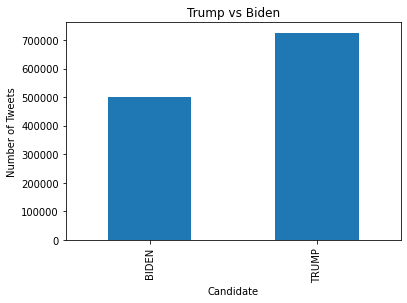

In [8]:
#Plot the number of tweets for each candidate 
Data_Mixed.groupby('Candidate')['tweet'].count().plot.bar()
plt.ylabel('Number of Tweets')
plt.title('Trump vs Biden')
plt.show()

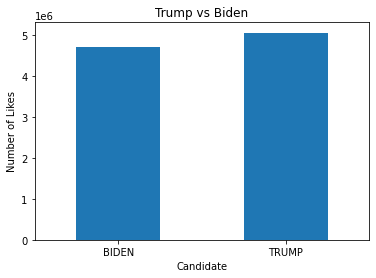

In [9]:
#Plot the number of likes for each candidate 
Data_Mixed.groupby('Candidate')['likes'].sum().plot.bar()
plt.ylabel('Number of Likes')
plt.xticks(rotation = 0)
plt.title('Trump vs Biden')
plt.show()

In [10]:
Data_Mixed.country.value_counts()

United States of America    262250
United States                50846
United Kingdom               35946
Germany                      23590
France                       22459
                             ...  
Tonga                            2
Turks and Caicos Islands         1
Northern Mariana Islands         1
Antigua and Barbuda              1
Saint Lucia                      1
Name: country, Length: 185, dtype: int64

In [11]:
Data_Mixed['country'] = Data_Mixed['country'].replace({"United States of America" : "US", "United States": "US"})

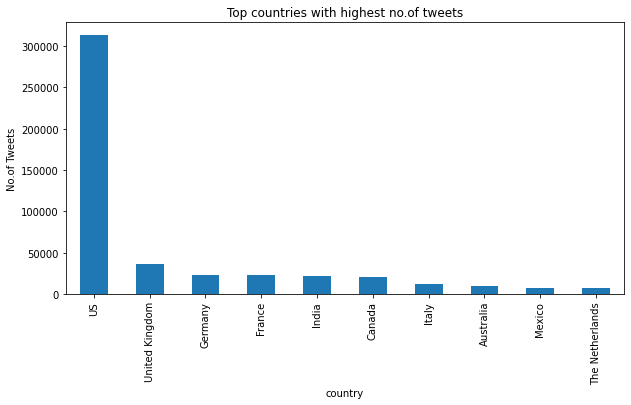

In [12]:
#Countries with highest no.of tweets
plt.figure(figsize=(10,5))
Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("No.of Tweets")
plt.title("Top countries with highest no.of tweets")
plt.show()

In [13]:
top10Countries = Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

In [14]:
#Tweets for Biden and Trump from each country
tweet_df = Data_Mixed.groupby(['country', 'Candidate'])['tweet'].count().reset_index()
tweet_df = tweet_df[tweet_df['country'].isin(top10Countries)]
tweet_df

,country,Candidate,tweet
15,Australia,BIDEN,3601
16,Australia,TRUMP,6691
52,Canada,BIDEN,7401
53,Canada,TRUMP,13320
109,France,BIDEN,8244
110,France,TRUMP,14215
115,Germany,BIDEN,7503
116,Germany,TRUMP,16087
143,India,BIDEN,9155
144,India,TRUMP,12736


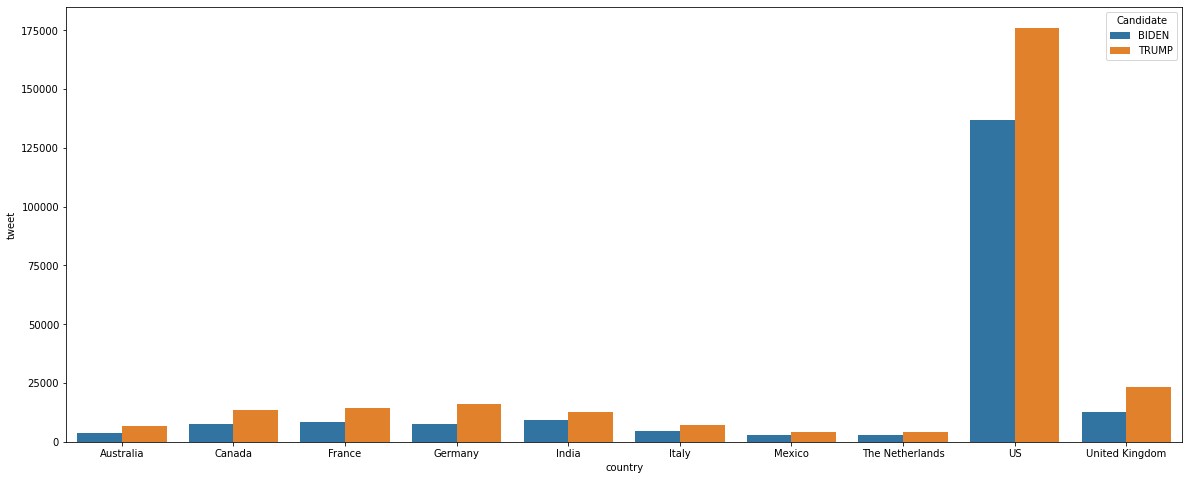

In [15]:
#Plot top 10 contries with highest no.of tweets for trump and biden 
plt.figure(figsize=(20,8))
sns.barplot(data = tweet_df, y = 'tweet', x = "country", hue = "Candidate")
plt.show()

In [16]:
#List of top 10 states with highest no.of tweets
top10States = Data_Mixed.groupby('state')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

#Tweets for Biden and Trump from each state
state_df = Data_Mixed.groupby(['state', 'Candidate'])['tweet'].count().reset_index()
state_df = state_df[state_df['state'].isin(top10States)]
state_df

,state,Candidate,tweet
201,California,BIDEN,18746
202,California,TRUMP,25781
338,District of Columbia,BIDEN,5027
339,District of Columbia,TRUMP,8097
375,England,BIDEN,9185
376,England,TRUMP,16047
398,Florida,BIDEN,10348
399,Florida,TRUMP,13905
502,Ile-de-France,BIDEN,4210
503,Ile-de-France,TRUMP,6709


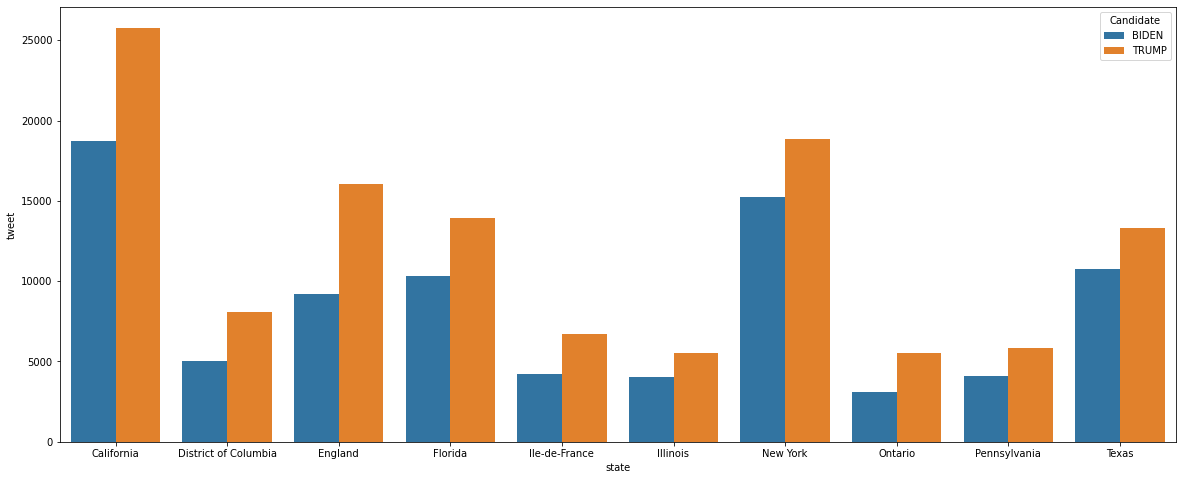

In [17]:
#Plot top 10 state with highest no.of tweets for trump and biden 
plt.figure(figsize=(20,8))
sns.barplot(data = state_df, y = 'tweet', x = "state", hue = "Candidate")
plt.show()

## Sentiment Analysis of Presidential Elections

In [18]:
def clean(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation and remove words containing numbers'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'[^\w]', ' ', text)
    return text

In [19]:
#make the function to get subjectivity and polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score < 0:
        return -1
    elif score == 0:
        return 0
    else:
        return 1
        

### Donald Trump tweets Sentiment Analysis

In [20]:
Trump_Tweets = Data_Mixed.query('(Candidate == "TRUMP")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country']]
Trump_Tweets = Trump_Tweets.dropna().loc[Trump_Tweets.country == 'US']

Trump_Tweets.reset_index(inplace = True, drop = True)

Trump_Tweets['ClearTweet'] = Trump_Tweets['tweet'].apply(clean)

Trump_Tweets['subjectivity']= Trump_Tweets['ClearTweet'].apply(getSubjectivity)
Trump_Tweets['polarity']    = Trump_Tweets['ClearTweet'].apply(getPolarity)
Trump_Tweets['analysis']    = Trump_Tweets['polarity'].apply(getAnalysis)


Trump_Tweets.head()

,tweet,country,ClearTweet,subjectivity,polarity,analysis
0,"President Donald #Trump’s youngest daughter, T...",US,president donald trump s youngest daughter ti...,0.0,0.0,0
1,Woah. Have you read this article?\n\nAll the p...,US,woah have you read this article all the presi...,0.0,0.0,0
2,#SethMeyers lambastes Fox News for parroting #...,US,sethmeyers lambastes fox news for parroting do...,0.0,0.0,0
3,📌 Las #noticias más importantes de la mañana: ...,US,las noticias más importantes de la mañana ...,0.0,0.0,0
4,#Trump Habla en segundos. Todavía nada está de...,US,trump habla en segundos todavía nada está def...,0.0,0.0,0


In [21]:
from locale import normalize


Trump_Tweets.analysis.value_counts(normalize = True)*100

 0    42.691940
 1    36.838048
-1    20.470013
Name: analysis, dtype: float64

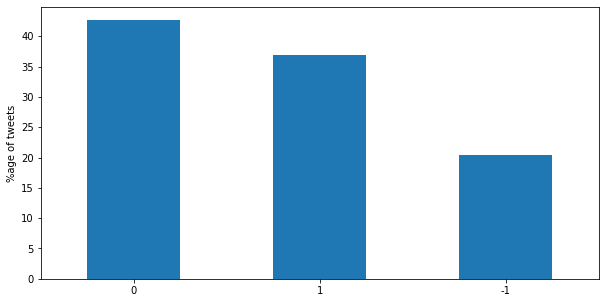

In [22]:
# Plot graph for analysis of trump tweets
plt.figure(figsize=(10,5))
(Trump_Tweets.analysis.value_counts(normalize = True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.xticks(rotation = 0)
plt.show()

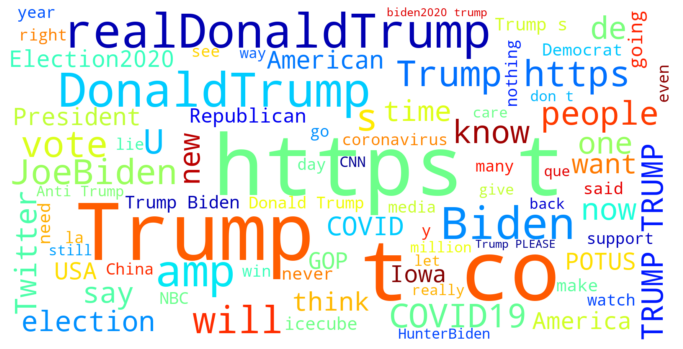

In [23]:
from turtle import width
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS);
    all_words = " ".join([text for text in wd_list])
    wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1600, height = 800, random_state = 10, colormap = 'jet', max_words = 80, max_font_size = 200).generate(all_words)
    plt.figure(figsize =(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear');

word_cloud(trump_df['tweet'][:5000])

### Joe Biden tweets Sentiment Analysis

In [24]:
Biden_Tweets = Data_Mixed.query('(Candidate == "BIDEN")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country']]
Biden_Tweets = Biden_Tweets.dropna().loc[Biden_Tweets.country == 'US']

Biden_Tweets.reset_index(inplace = True, drop = True)

Biden_Tweets['ClearTweet'] = Biden_Tweets['tweet'].apply(clean)

Biden_Tweets['subjectivity']= Biden_Tweets['ClearTweet'].apply(getSubjectivity)
Biden_Tweets['polarity']    = Biden_Tweets['ClearTweet'].apply(getPolarity)
Biden_Tweets['analysis']    = Biden_Tweets['polarity'].apply(getAnalysis)


Biden_Tweets.head()

,tweet,country,ClearTweet,subjectivity,polarity,analysis
0,#JoeBiden is enlisting A-list star power to he...,US,joebiden is enlisting a list star power to hel...,0.000000,0.000000,0
1,The big fight TODAY!!!!! @realDonaldTrump vs #...,US,the big fight today vs joebiden who you ...,0.100000,0.000000,0
2,#JimmyKimmel offered his view about how the la...,US,jimmykimmel offered his view about how the las...,0.177778,-0.077778,-1
3,Sigue el conteo de votos en #Georgia: #Trump y...,US,sigue el conteo de votos en georgia trump y b...,0.000000,0.000000,0
4,"Are you there, God? It's me again, Bette. We'r...",US,are you there god it s me again bette we r...,0.383333,0.233333,1


In [25]:
Biden_Tweets.analysis.value_counts(normalize = True)*100

 0    44.793862
 1    38.651404
-1    16.554733
Name: analysis, dtype: float64

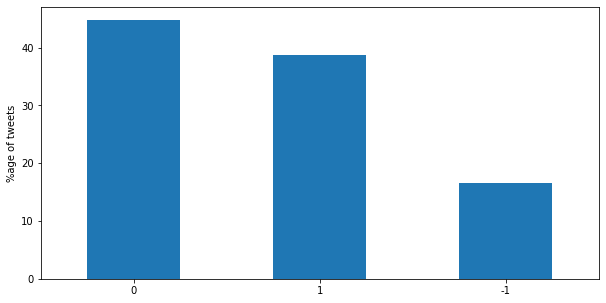

In [26]:
# Plot graph for analysis of Biden tweets
plt.figure(figsize=(10,5))
(Biden_Tweets.analysis.value_counts(normalize = True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.xticks(rotation = 0)
plt.show()

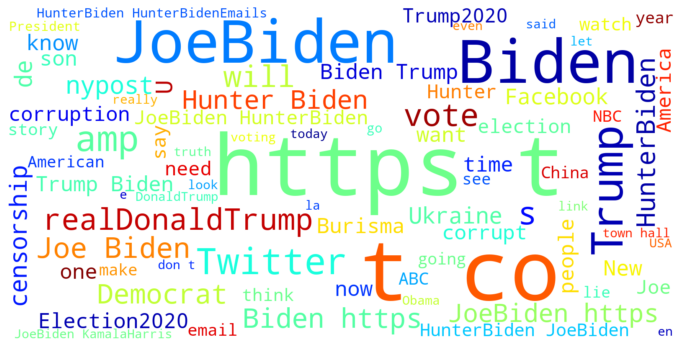

In [27]:
word_cloud(biden_df['tweet'][:5000])

## Predicting the sentiment fo the Tweets

In [28]:
df = pd.read_csv('hashtag_donaldtrump.csv', lineterminator='\n', usecols = ['tweet'])
df.head(10)

,tweet
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...
1,"Usa 2020, Trump contro Facebook e Twitter: cop..."
2,"#Trump: As a student I used to hear for years,..."
3,2 hours since last tweet from #Trump! Maybe he...
4,You get a tie! And you get a tie! #Trump ‘s ra...
5,@CLady62 Her 15 minutes were over long time ag...
6,@richardmarx Glad u got out of the house! DICK...
7,@DeeviousDenise @realDonaldTrump @nypost There...
8,One of the single most effective remedies to e...
9,#Election2020 #Trump \n#FreedomOfSpeech https:...


In [29]:
df.shape

(725654, 1)

In [30]:
df = df[0:100000]
df.shape

(100000, 1)

In [31]:
df.isnull().sum()

tweet    0
dtype: int64

#### Contraction to Expand

In [32]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [33]:
def cont_to_exp(x):
     if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
     else:
        return x

In [34]:
cont_to_exp("i don't have any money\.")

'i do not have any money.'

In [35]:
df['tweet'] = df['tweet'].apply(lambda x: cont_to_exp(x))
df.head()

,tweet
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...
1,"Usa 2020, Trump contro Facebook e Twitter: cop..."
2,"#Trump: As a student I used to hear for years,..."
3,2 hours since last tweet from #Trump! Maybe he...
4,You get a tie! And you get a tie! #Trump ‘s ra...


#### Cleaning Tweets

In [36]:
def clean_tweets(text):
    text = re.sub(r'\brt\b', "", text) # remove retweets RT
    text = re.sub(r'[^\w ]+', "", text) # remove mentions4
    text = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-])',"", text) # remove emails
    text = re.sub(r'([http|https|ftp|ssh])://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%/~+#-]*[\w@?^=%&/~+#-])?',"", text) # remove Urls
    text = re.sub(r'\n', "", text)
    return text

In [37]:
df['tweet'] = df['tweet'].apply(lambda x: clean_tweets(x))
df.head(10)

,tweet
0,Elecciones2020 En Florida JoeBiden dice que D...
1,Usa 2020 Trump contro Facebook e Twitter copro...
2,Trump As a student I used to hear for years fo...
3,2 hours since last tweet from Trump Maybe he i...
4,You get a tie And you get a tie Trump s rally ...
5,CLady62 Her 15 minutes were over long time ago...
6,richardmarx Glad u got out of the house DICKtr...
7,DeeviousDenise realDonaldTrump nypost There wo...
8,One of the single most effective remedies to e...
9,Election2020 Trump FreedomOfSpeech httpstco9sl...


In [38]:
' '.join(df['tweet'].tolist()[:10])

'Elecciones2020  En Florida JoeBiden dice que DonaldTrump solo se preocupa por él mismo El demócrata fue anfitrión de encuentros de electores en PembrokePines y Miramar Clic AQUÍ httpstcoqhIWpIUXsT_ElSolLatino yobrilloconelsol httpstco6FlCBWf1Mi Usa 2020 Trump contro Facebook e Twitter coprono Biden  donaldtrump httpstco6ceURhe1VP httpstco94jidLjoON Trump As a student I used to hear for years for ten years I heard China In 2019 And we have 15 and they do not know how many we have and I asked them how many do we have and they said sir we do not know But we have millions Like 300 millionUm What 2 hours since last tweet from Trump Maybe he is VERY busy Tremendously busy You get a tie And you get a tie Trump s rally Iowa httpstcojJalUUmh5D CLady62 Her 15 minutes were over long time ago Omarosa never represented the black community TheReidOut She cried to Trump begging for a job richardmarx Glad u got out of the house DICKtrump 2020 DeeviousDenise realDonaldTrump nypost There wont be many o

#### Check Polarity

In [39]:
df['polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

#### Now Create a Model For Sentiment Analysis

In [40]:
def polarity_to_sentiment(x):
#     if type(x) is float:
#         for i in range(0, len(x)):
    if x > 0:
        return 1 # 1 = Positive
    if x < 0:
        return 0 # 0 = negative
    else:
        return 2 # 2 = Neutral

In [41]:
df['sentiments'] = df['polarity'].apply(lambda x: polarity_to_sentiment(x))

In [42]:
df.head()

,tweet,polarity,sentiments
0,Elecciones2020 En Florida JoeBiden dice que D...,0.000000,2
1,Usa 2020 Trump contro Facebook e Twitter copro...,0.000000,2
2,Trump As a student I used to hear for years fo...,0.333333,1
3,2 hours since last tweet from Trump Maybe he i...,0.076667,1
4,You get a tie And you get a tie Trump s rally ...,0.000000,2


#### Distribution of Sentiments

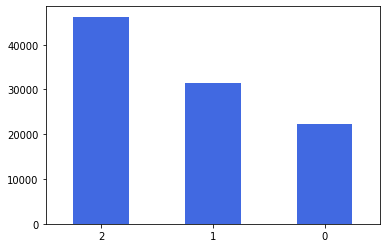

In [43]:
df['sentiments'].value_counts().plot.bar(color='royalblue')
plt.xticks(rotation = 0)
plt.show()

#### Split the Data to Dependent and Indepedent

In [44]:
# dependent Features
y = df['sentiments']

# Independent Features
X = df.drop('sentiments', axis=1)

### PorterStemmer

In [45]:
messages = X.copy()

In [46]:
from nltk import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('words')
words = set(nltk.corpus.words.words())
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ameya\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [47]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', str(messages['tweet'][i]))
    
    review = review.lower()
    review = review.split()
    review = [w for w in nltk.wordpunct_tokenize(str(review)) if w.lower() in words or not w.isalpha()]
    
    review = [ps.stem(word) for word in review if not word in stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [48]:
corpus[0]

"[' ', ' en ', ' ', ' ', ' dice ', ' ', ' ', ' solo ', ' se ', ' ', ' ', ' l ', ' ', ' el ', ' ', ' ', ' ', ' ', ' n ', ' de ', ' ', ' de ', ' ', ' en ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' mi ']"

### Tokenize the Data

In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [50]:
voc_size = 50000
max_len = 120
embedding_features = 32

In [51]:
tokenizer = Tokenizer(num_words=voc_size, oov_token = '<OOV>')
tokenizer.fit_on_texts(corpus)

### Embedding

In [52]:
sequences = tokenizer.texts_to_sequences(corpus)

In [53]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
embedded_doc = pad_sequences(sequences, maxlen=max_len, padding= 'post', truncating = 'post')
embedded_doc[0]

array([  2,   2,   2,  21,   2,   2,   2,   2,   2,   2, 972,   2,   2,
         2,   2,   2,   2, 877,   2,   2,  97,   2,   2,   2,   2,   2,
         2,  73,   2,   2,   2,   2,  52,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,  20,   2,   2,   7,   2,   2,   2,   2,   7,
         2,   2,   2,   2,  21,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2, 644,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0])

In [54]:
X_final = np.array(embedded_doc)
y_final = np.array(y)

In [55]:
X_final.shape, y_final.shape

((100000, 120), (100000,))

### Model Creation

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU

In [57]:
model = Sequential()
model.add(Embedding(voc_size, embedding_features, input_length = max_len))
# model.add(Dropout(0.3))
model.add(GRU(100))
model.add(Dense(62, activation = 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 32)           1600000   
                                                                 
 gru (GRU)                   (None, 100)               40200     
                                                                 
 dense (Dense)               (None, 62)                6262      
                                                                 
 dense_1 (Dense)             (None, 32)                2016      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,648,577
Trainable params: 1,648,577
Non-trainable params: 0
_________________________________________________________________
None


### Split the Data into Train and Test


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, stratify = y, random_state=42)

### Train The Model

In [59]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size=20)

Epoch 1/10
3750/3750 [==============================] - 359s 95ms/step - loss: 0.6314 - accuracy: 0.7392 - val_loss: 0.4805 - val_accuracy: 0.8302
Epoch 2/10
3750/3750 [==============================] - 348s 93ms/step - loss: 0.4430 - accuracy: 0.8474 - val_loss: 0.4392 - val_accuracy: 0.8520
Epoch 3/10
3750/3750 [==============================] - 349s 93ms/step - loss: 0.4049 - accuracy: 0.8620 - val_loss: 0.4272 - val_accuracy: 0.8582
Epoch 4/10
3750/3750 [==============================] - 358s 95ms/step - loss: 0.3795 - accuracy: 0.8722 - val_loss: 0.4283 - val_accuracy: 0.8593
Epoch 5/10
3750/3750 [==============================] - 356s 95ms/step - loss: 0.3615 - accuracy: 0.8779 - val_loss: 0.4327 - val_accuracy: 0.8592
Epoch 6/10
3750/3750 [==============================] - 373s 100ms/step - loss: 0.3435 - accuracy: 0.8836 - val_loss: 0.4306 - val_accuracy: 0.8610
Epoch 7/10
3750/3750 [==============================] - 375s 100ms/step - loss: 0.3210 - accuracy: 0.8910 - val_loss:

### Performance Metrics and Accuracy

In [60]:
y_pred = ((model.predict(X_test)>0.5).astype('int32'))

782/782 [==============================] - 34s 43ms/step


#### Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, np.argmax(y_pred, axis = 1))

array([[ 4535,   629,   409],
       [  986,  6262,   616],
       [  783,   524, 10256]], dtype=int64)

#### Accuracy

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, np.argmax(y_pred, axis=1))

0.84212